In [1]:
from altaipony.lcio import from_mast
from lightkurve import search_targetpixelfile

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
ID = 211939364
C = 16
flc = from_mast(ID, mission="K2", mode="TPF", c=C)

Loading KWallet
Loading SecretService
Loading Windows
Loading chainer
Loading macOS
/work1/eilin/Flares_in_Clusters_2/Results/AltaiPony/altaipony/lib64/python3.6/site-packages/jeepney-0.4.1-py3.6.egg/jeepney/low_level.py:319: ResourceWarning: unclosed <socket.socket fd=58, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1973/bus>
  l = [(i.value, (header_field_codes[i], v)) for (i, v) in sorted(d.items())]
/work1/eilin/Flares_in_Clusters_2/Results/AltaiPony/altaipony/lib64/python3.6/site-packages/astropy-3.2.1-py3.6-linux-x86_64.egg/astropy/utils/decorators.py:103: ResourceWarning: unclosed <socket.socket fd=59, family=AddressFamily.AF_UNIX, type=SocketKind.SOCK_STREAM, proto=0, raddr=/run/user/1973/bus>
  def deprecate_function(func, message, warning_type=warning_type):
/work1/eilin/Flares_in_Clusters_2/Results/AltaiPony/altaipony/lib64/python3.6/site-packages/astropy-3.2.1-py3.6-linux-x86_64.egg/astropy/utils/decorators.py:103: ResourceWarning: unc

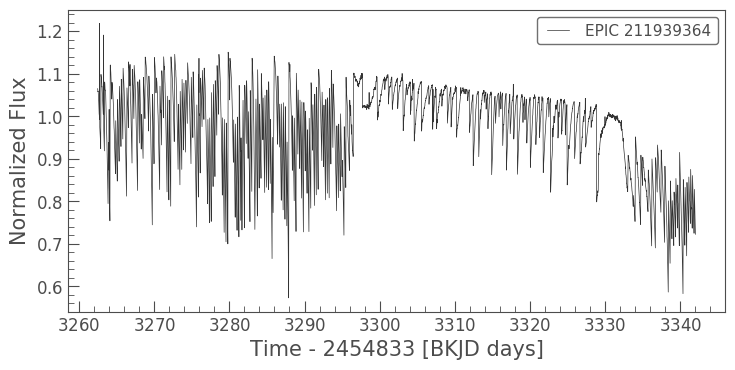

In [3]:
flc.plot()

In [4]:
flc = flc.detrend("k2sc")

Starting initial outlier detection at 3sigma.
iteration 1 at normalized median flux1.00000 \pm 0.00210
iteration 2 at normalized median flux0.99995 \pm 0.00199
iteration 3 at normalized median flux0.99995 \pm 0.00197
iteration 4 at normalized median flux0.99995 \pm 0.00196
iteration 5 at normalized median flux0.99995 \pm 0.00196
iteration 6 at normalized median flux0.99995 \pm 0.00196
iteration 7 at normalized median flux0.99995 \pm 0.00196
iteration 8 at normalized median flux0.99995 \pm 0.00196
iteration 9 at normalized median flux0.99995 \pm 0.00196
iteration 10 at normalized median flux0.99995 \pm 0.00196
  Flagged 162 ( 4.4%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =   18.36 (fap 2.7757e-241 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 -3507.769706111656
  DE iteration %3i -ln(L) %4.1f 1 -3507.769706111656
  DE iteration %3i -ln(L) %4.1f 2 

De-trending successfully completed.


  CDPP - raw - %6.3f 35545.133820395116
  CDPP - position component removed - %6.3f 725.8832045789917
  CDPP - full reduction - %6.3f 716.920299419611
Detrending time %6.3f 355.07190012931824


In [5]:
flc = flc.find_flares()
flc.flares

Found 0 candidate(s) in the (0,93) gap.
Found 0 candidate(s) in the (93,869) gap.
Found 0 candidate(s) in the (869,942) gap.
Found 0 candidate(s) in the (942,1046) gap.
Found 2 candidate(s) in the (1046,3645) gap.
/work1/eilin/Flares_in_Clusters_2/Results/AltaiPony/altaipony/lib64/python3.6/site-packages/pandas-0.25.1-py3.6-linux-x86_64.egg/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,tstop
0,0.009850,155485,155490,77.082815,6.388674,1050,1055,3645.0,3286.050520,3286.152698
1,0.018916,157101,157104,65.204420,4.449113,2576,2579,3645.0,3319.074391,3319.135697


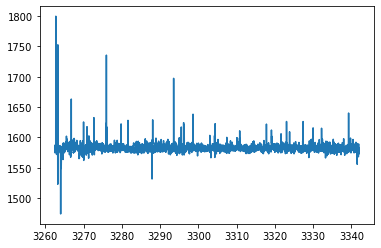

In [6]:
plt.plot(flc.time, flc.detrended_flux)
#plt.xlim(3318, 3321)
#plt.xlim(3284, 3290)

In [4]:
tpf = search_targetpixelfile("EPIC {}".format(ID), campaign=C).download()


Found cached file /home/eilin/.lightkurve-cache/mastDownload/K2/ktwo211939364-c16_lc/ktwo211939364-c16_lpd-targ.fits.gz with expected size 4902787.
6% (249/3894) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (249/3894) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


In [7]:
%matplotlib inline
tpf.interact(notebook_url='http://0.0.0.0:8080')


Starting Bokeh server version 1.3.4 (running on Tornado 6.0.3)


W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: RangeSlider(id='1430', ...)
200 GET /autoload.js?bokeh-autoload-element=1331&bokeh-absolute-url=http://localhost:41391&resources=none (127.0.0.1) 503.96ms
Refusing websocket connection from Origin 'http://0.0.0.0:8081';                       use --allow-websocket-origin=0.0.0.0:8081 or set BOKEH_ALLOW_WS_ORIGIN=0.0.0.0:8081 to permit this; currently we allow origins {'localhost:8888'}
403 GET /ws?bokeh-protocol-version=1.0&bokeh-session-id=zEgmnoImoG3yZTjcQPDKRxoLvuRPaIEL9PwSYwgL8fcx (127.0.0.1) 1.31ms


In [9]:
# import seaborn as sns
# from matplotlib.colors import PowerNorm
# %matplotlib inline
# ras = tpf.get_coordinates(cadence=0)[0]
# decs = tpf.get_coordinates(cadence=0)[1]
# labels = np.chararray(ras.shape, itemsize=20, unicode=True)

# for i, row in enumerate(ras):
#     if i%5==0:
#         for j, col in enumerate(row):
#             if j%5 ==0:
#         #         l = "{:.4f}\n{:.4f}".format(col-tpf.ra, decs[i][j]-tpf.dec)
#                # l = "{:.4f}\n{:.4f}".format(col-92.154527, decs[i][j]-24.233511)
#                 l = "{:.03f}".format(100*np.sqrt((col-92.154527)**2+(decs[i][j]-24.233511)**2))
#                 labels[i][j] = l

# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(tpf.flux[0][:][::-1], annot = labels[:][::-1], fmt = '', ax=ax, cmap="viridis", norm=PowerNorm(gamma=1./2.))

W-1005 (FIXED_SIZING_MODE): 'fixed' sizing mode requires width and height to be set: RangeSlider(id='1100', ...)
200 GET /autoload.js?bokeh-autoload-element=1001&bokeh-absolute-url=http://0.0.0.0:42463&resources=none (127.0.0.1) 558.14ms
Refusing websocket connection from Origin 'http://0.0.0.0:8081';                       use --allow-websocket-origin=0.0.0.0:8081 or set BOKEH_ALLOW_WS_ORIGIN=0.0.0.0:8081 to permit this; currently we allow origins {'0.0.0.0:8080'}
403 GET /ws?bokeh-protocol-version=1.0&bokeh-session-id=Gm9w6XR7r9mGlvAySHrwnZk631htnn3fPG6d9JpTAfsD (127.0.0.1) 2.71ms
